In [4]:
# Importing necessary Libraries for the analysis

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np,pandas as pd
from math import isnan
from sklearn.metrics import silhouette_score

In [5]:
# reading the data

df=pd.read_excel(r"c:\Users\Admin\Downloads\Main.xlsx")
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [6]:
print(df.info())
print("-/-"*20)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB
None
-/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/-
         Illiterate  Graduate & above  Total - Population  \
count  3.500000e+01      3.500000e+01        3.500000e+01   
mean   7.678103e+06      1.075194e+06        3.459586e+07   
std    1.133721e+07      1.399289e+06        4.445234e+07   
min    8.337000e+03      1.482000e+03        6.447300e+04   
2

In [7]:
# Scaling the Data

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])

In [8]:
# Converting the np array after scaling to a df

Scaled_df=pd.DataFrame(df_scaled)
Scaled_df.columns=['Illiterate', 'Graduate & above', 'Total - Population','Percentage Illiterate', 'Percentage Graduate & above']
Scaled_df.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


In [9]:
#Hopkins Test Statistic Analysis to determine Clustering Tendency
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(Scaled_df)

# Test statistic of value 0.85 shows high clustering Tendency, lets move ahead with finding optimum number of clusters in next step

0.7727375406738546

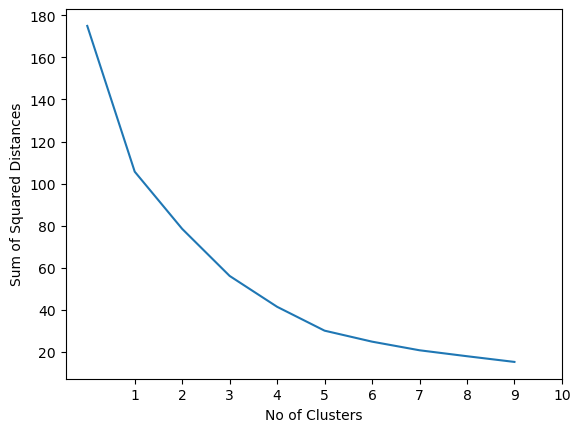

In [10]:
# Analyzing the optimal number of Clusters using Elbow Curve Method (SSD)

ec=[]
n=[i for i in range(1,11)]
for i in n:
    KM=KMeans(n_clusters=i,max_iter=50)
    mod=KM.fit(Scaled_df)
    ec.append(mod.inertia_)

plt.plot(ec)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("No of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()
    

In [11]:
# Rechecking the optimal Number of clusters using Silhouette Score
n=[i for i in range(2,11)]
for i in n:
    KM=KMeans(n_clusters=i,max_iter=50)
    mod=KM.fit(Scaled_df)
    labels=mod.labels_
    sh=silhouette_score(Scaled_df,labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, sh))

For n_clusters=2, the silhouette score is 0.38913889968693116
For n_clusters=3, the silhouette score is 0.29360956319988357
For n_clusters=4, the silhouette score is 0.313798638027045
For n_clusters=5, the silhouette score is 0.3385024812617021
For n_clusters=6, the silhouette score is 0.35407879618855836
For n_clusters=7, the silhouette score is 0.33819068321237516
For n_clusters=8, the silhouette score is 0.31319613095601806
For n_clusters=9, the silhouette score is 0.29351326383626386
For n_clusters=10, the silhouette score is 0.2975755139144726


In [12]:
# As pe Elbow Curve and Silhouette Score we choose the optimal number of clusters to be 5
KM=KMeans(n_clusters=6,max_iter=100)
mod=KM.fit(Scaled_df.iloc[:,:-1])
KM.labels_

array([4, 5, 0, 5, 0, 0, 0, 2, 1, 2, 5, 4, 0, 0, 0, 5, 4, 4, 3, 4, 0, 0,
       2, 3, 5, 0, 3, 3, 3, 5, 5, 5, 3, 5, 5])

In [13]:
Scaled_df['Area Name']=df['Area Name']
Scaled_df['Cluster_id']=KM.labels_
Scaled_df.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,Area Name,Cluster_id
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185,State - JAMMU & KASHMIR,4
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526,State - HIMACHAL PRADESH,5
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016,State - PUNJAB,0
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645,State - CHANDIGARH,5
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547,State - UTTARAKHAND,0


In [14]:
Scaled_df.Cluster_id.value_counts()

Cluster_id
5    10
0    10
3     6
4     5
2     3
1     1
Name: count, dtype: int64

In [15]:
Scaled_df.columns[:-2]

Index(['Illiterate', 'Graduate & above', 'Total - Population',
       'Percentage Illiterate', 'Percentage Graduate & above'],
      dtype='object')

In [16]:
def plots():
    y=Scaled_df.columns[:-2]
    for i in y:
        sns.boxplot(x='Cluster_id',y=i, data=Scaled_df)
        plt.show()

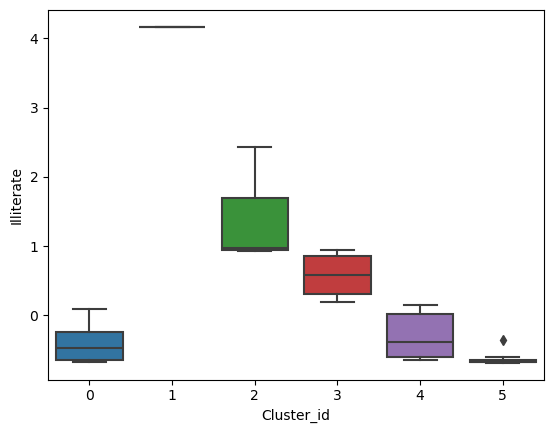

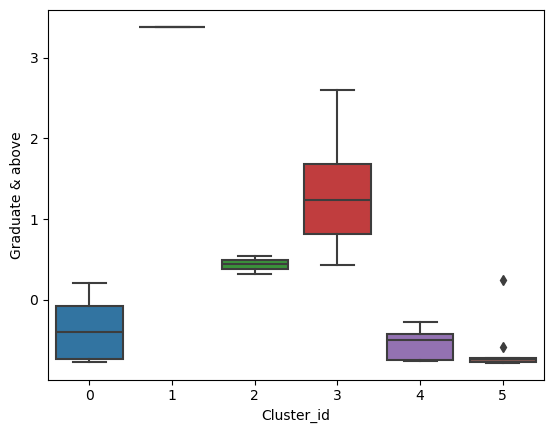

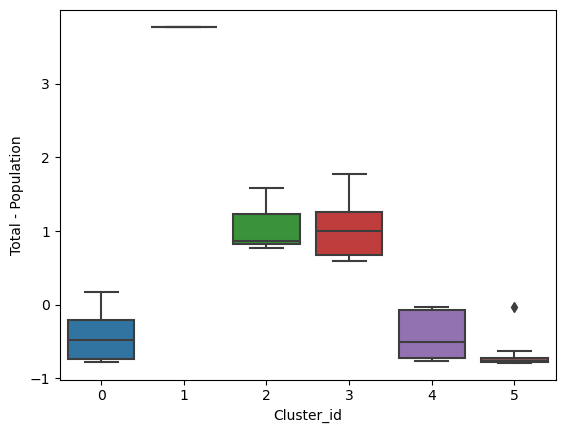

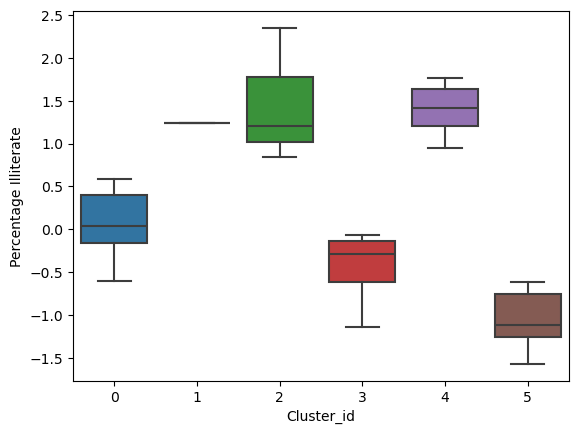

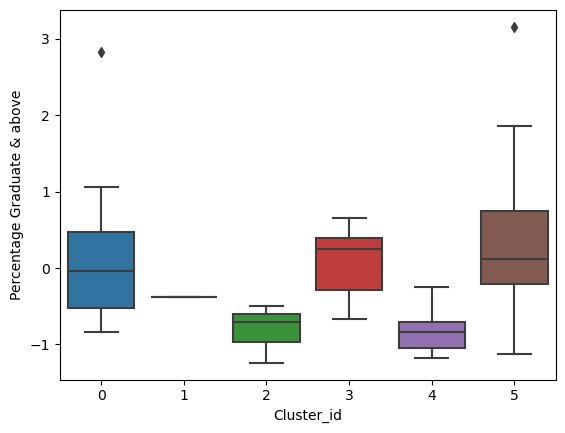

In [17]:
plots()

In [18]:
Scaled_df[Scaled_df['Cluster_id']==4]

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,Area Name,Cluster_id
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185,State - JAMMU & KASHMIR,4
11,-0.650759,-0.756144,-0.758048,1.632869,-0.699294,State - ARUNACHAL PRADESH,4
16,-0.607145,-0.741411,-0.721913,1.765172,-1.043098,State - MEGHALAYA,4
17,0.025259,-0.426347,-0.077381,0.952145,-1.173876,State - ASSAM,4
19,0.143383,-0.274674,-0.036695,1.413974,-0.838101,State - JHARKHAND,4
